<a href="https://colab.research.google.com/github/efraimar/pytorch_study/blob/main/SGD_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

If we start close to a local minimum, SGD may converge to it and fail to reach the global minimum.  
If we start from a poor initial point, SGD may move in the wrong direction or get stuck in a flat region of the function.  

📌 **Example:**  
Suppose our function \( f(x, y) \) has multiple peaks and valleys. If we start at a random location, SGD will move in the direction of the steepest descent **in the nearby region**, but not necessarily toward the global minimum.

In [2]:
def three_D(x,y):

  x,y = np.meshgrid(x,y)
  z = x**2 + y**2 + 5 * np.sin(2 * x) * np.cos(2 * y)
  return z



#Z(x,y) = x^2 + y^2 + 5sin(2x)cos(2y)
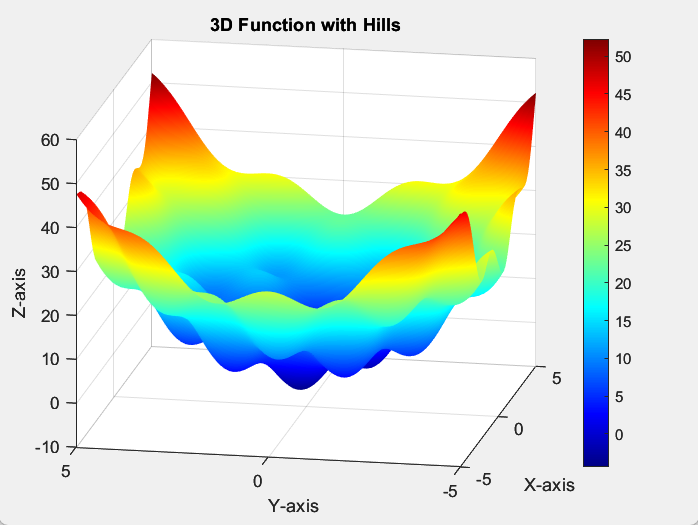



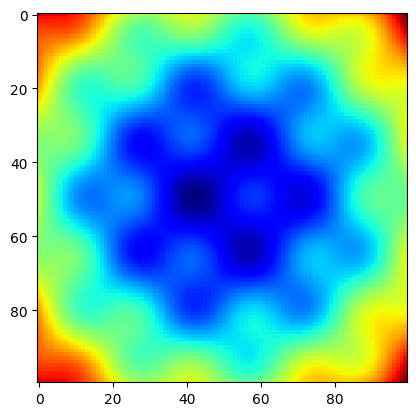

In [4]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
z = three_D(x,y)
z = plt.imshow(z, cmap='jet')
plt.show()

Epoch: 0, x: 0.9047201871871948, y: 0.0, z: 5.6792378425598145
Epoch: 100, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 200, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 300, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 400, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 500, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 600, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 700, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 800, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969
Epoch: 900, x: 2.135547161102295, y: 0.0, z: 0.03956413269042969


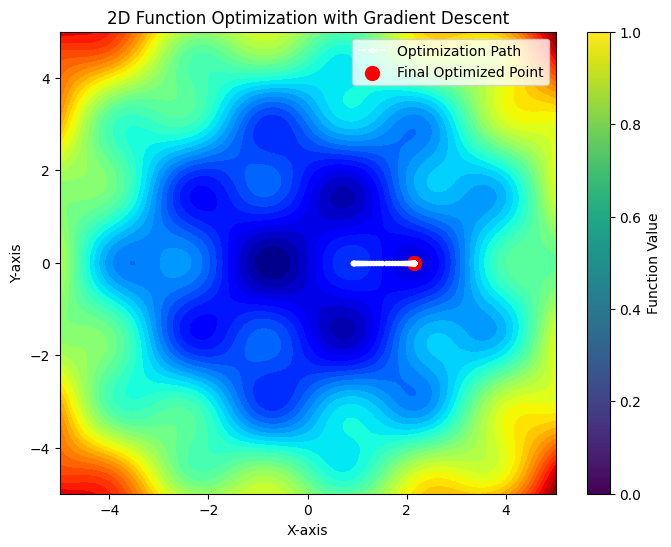

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Function to compute z values
def three_D_fun(x, y):
    return x**2 + y**2 + 5 * torch.sin(2 * x) * torch.cos(2 * y)

# Initialize variables
x = torch.tensor(0.9, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)
learning_rate = 0.01
optimizer = torch.optim.SGD([x, y], lr=learning_rate)

# Store the path of (x, y) during optimization
x_path = []
y_path = []

# Optimization loop
for epoch in range(1000):
    optimizer.zero_grad()
    z = three_D_fun(x, y)  # Compute z
    z.backward()
    optimizer.step()

    # Save the path of (x, y)
    x_path.append(x.item())
    y_path.append(y.item())

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, x: {x.item()}, y: {y.item()}, z: {z.item()}")

# Convert the final values to NumPy format
x_final = x.detach().numpy()
y_final = y.detach().numpy()

# Create a grid of X and Y values to compute Z
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 + 5 * np.sin(2 * X) * np.cos(2 * Y)

# Create a 2D plot
plt.figure(figsize=(8, 6))

# Display the heatmap of the function values
plt.contourf(X, Y, Z, levels=50, cmap='jet')

# Plot the optimization path of (x, y)
plt.plot(x_path, y_path, color='white', linestyle='dashed', marker='o', markersize=3, label="Optimization Path")

# Mark the final (x, y) point in red
plt.scatter(x_final, y_final, color='red', s=100, marker='o', label="Final Optimized Point")

# Labels and titles
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Function Optimization with Gradient Descent')
plt.colorbar(label="Function Value")
plt.legend()

# Show the plot
plt.show()
